In [1]:
#hide
#! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [4]:
fname = (path/'images').ls()[0]
fname

Path('images/Abyssinian_1.jpg')

In [5]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [6]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [7]:
#pets.summary(path/'images')

In [8]:
dls = pets.dataloaders(path/'images')

In [9]:
dls.train_ds[0]

(PILImage mode=RGB size=500x375, TensorCategory(30))

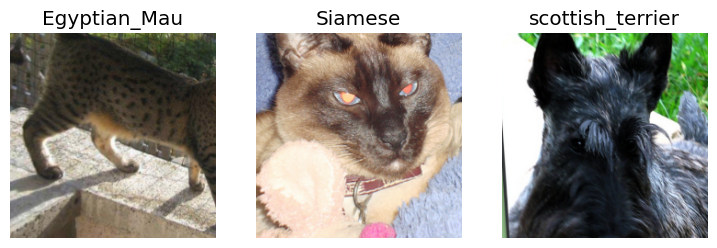

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
#hide_output
# pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
#                  get_items=get_image_files, 
#                  splitter=RandomSplitter(seed=42),
#                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
# pets1.summary(path/"images")

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.539706,0.323019,0.104195,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.508132,0.283013,0.087957,01:10
1,0.341571,0.206457,0.067659,01:11


In [13]:
x, y = dls.one_batch()

In [14]:
y

TensorCategory([14,  3, 18, 34, 36, 22,  9,  2,  8, 11, 23,  2, 23, 22,  8,  6, 15, 26, 35, 16,  9, 30, 13, 11, 14,  1, 18, 17, 23,  6, 28, 24, 17, 29, 31,  5, 26,  6, 36,  2, 25, 25, 11, 16,  5, 29,
                35, 20, 32, 12, 36,  8, 36,  0,  6, 15, 30, 27, 19,  9,  4, 32, 23,  4], device='cuda:0')

In [15]:
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([3.8491e-06, 1.0741e-05, 1.0410e-06, 3.0523e-07, 7.8352e-07, 3.5720e-07, 3.0912e-07, 4.8511e-07, 6.3911e-08, 1.1449e-06, 5.0370e-07, 1.5403e-07, 1.5109e-06, 2.5080e-04, 9.9388e-01, 5.7202e-03,
        2.1026e-05, 5.0582e-08, 2.0231e-05, 1.9477e-07, 8.6266e-07, 1.8324e-07, 1.6468e-07, 3.3567e-07, 3.7320e-08, 7.9414e-07, 5.8591e-05, 1.1748e-07, 3.2450e-08, 1.1266e-06, 7.1740e-06, 4.4773e-07,
        2.1479e-07, 9.2393e-07, 1.2287e-05, 5.1728e-07, 4.2881e-06])

In [16]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

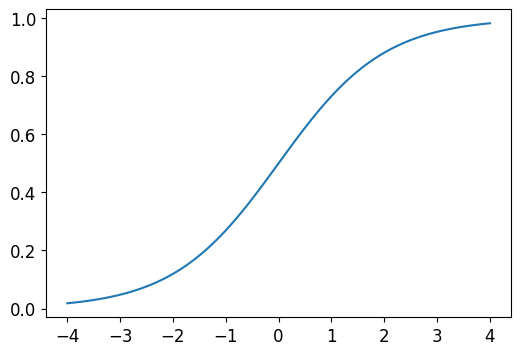

In [34]:
plot_function(torch.sigmoid, min=-4,max=4)

In [17]:
#hide
torch.random.manual_seed(42);

In [18]:
acts = torch.randn((6,2)) * 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [19]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [20]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [21]:
def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [22]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [35]:
targ = tensor([0,1,0,1,1,0])

In [36]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [38]:
#hide_inputb
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [39]:
-sm_acts[idx,targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [40]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

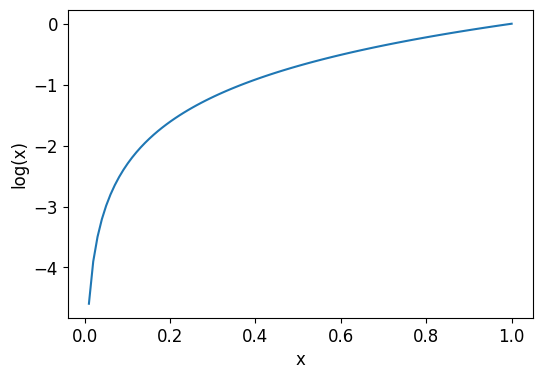

In [41]:
plot_function(torch.log, min=0, max=1, ty='log(x)', tx='x')

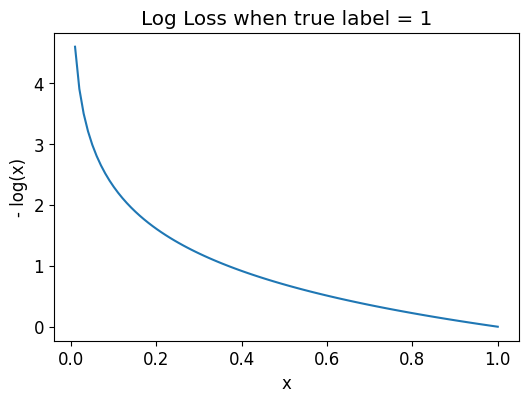

In [45]:
plot_function(lambda x: -1 * torch.log(x), min=0, max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [47]:
#hide_input
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result,loss
0.602469,0.397531,0,0,0.602469,0.506720
0.502065,0.497935,1,1,0.497935,0.697285
0.133188,0.866811,0,2,0.133188,2.015990
0.996640,0.003360,1,3,0.003360,5.695763
0.595949,0.404051,1,4,0.404051,0.906213
0.366118,0.633882,0,5,0.366118,1.004798


In [24]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.673416,6.139711,0.565629,01:06


epoch,train_loss,valid_loss,error_rate,time
0,4.033199,2.307807,0.664411,01:11


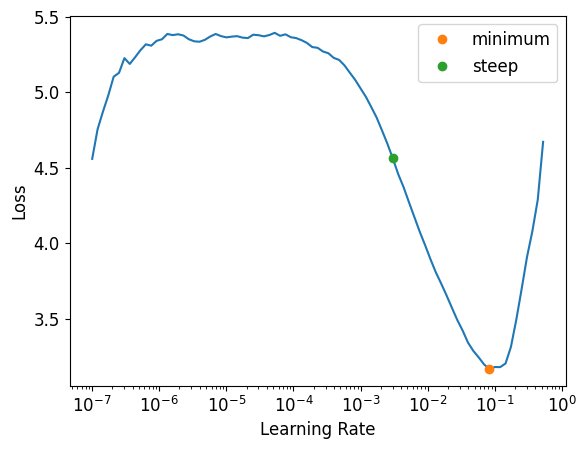

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum,steep))

In [26]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 3.02e-03


In [27]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.326014,0.303674,0.097429,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.563076,0.346264,0.104871,01:10
1,0.333840,0.223263,0.064276,01:09


In [28]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      c:\users\rainf\miniconda3\envs\fast\lib\site-packages\fastai\callback\schedule.py
Type:      method

In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.159472,0.276253,0.092016,01:02
1,0.533104,0.254492,0.082544,01:02
2,0.340598,0.211523,0.066982,01:02


In [30]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

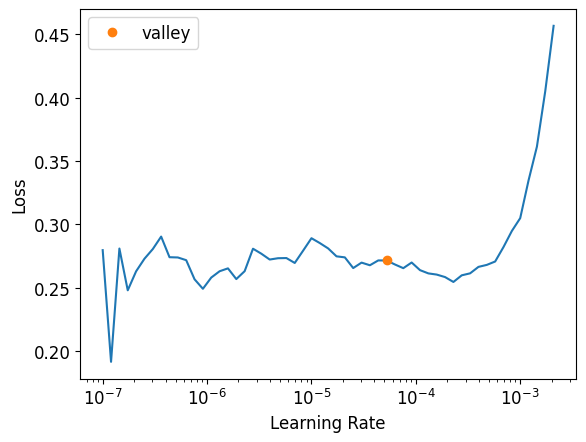

In [31]:
learn.lr_find()

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

In [32]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.155827,0.298553,0.098782,01:01
1,0.529074,0.251222,0.081191,01:01
2,0.326795,0.212138,0.067659,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.247589,0.207795,0.062923,01:07
1,0.241250,0.205240,0.062923,01:08
2,0.236656,0.197758,0.059540,01:09
3,0.214793,0.193087,0.056834,01:09
4,0.186127,0.189187,0.056834,01:08
5,0.181809,0.185230,0.053451,01:09
6,0.160628,0.183314,0.056834,01:09
7,0.152772,0.185674,0.059540,01:09
8,0.133873,0.182297,0.055480,01:08
9,0.130770,0.180001,0.058187,01:09


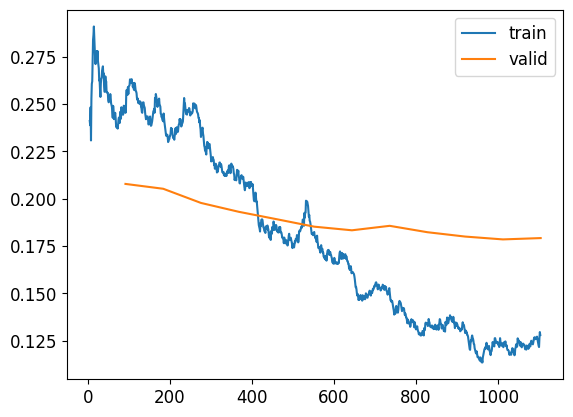

In [33]:
learn.recorder.plot_loss()